In [3]:
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Labels for the classes
labels = os.listdir('Final_dataset_small/Train')


# Load the model
model = load_model('Models/mobilenetv2_no_freeze.h5')
valid_dir = 'test_final_images'

# Generate the test data
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

valid_generator = img_generator.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    shuffle=False)

predictions = model.predict(valid_generator, workers=0, verbose=0)
y_pred = np.argmax(predictions, axis=1)
y_true = valid_generator.classes[valid_generator.index_array]

# Plot the confusion matrix with labels
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


Found 198 images belonging to 10 classes.
[[0.66666667 0.04761905 0.0952381  0.         0.         0.
  0.04761905 0.         0.04761905 0.0952381 ]
 [0.22222222 0.38888889 0.05555556 0.         0.         0.11111111
  0.05555556 0.         0.16666667 0.        ]
 [0.         0.10526316 0.84210526 0.         0.         0.
  0.         0.05263158 0.         0.        ]
 [0.47058824 0.05882353 0.11764706 0.05882353 0.05882353 0.05882353
  0.         0.05882353 0.         0.11764706]
 [0.1        0.         0.         0.05       0.6        0.05
  0.15       0.         0.         0.05      ]
 [0.28571429 0.04761905 0.04761905 0.         0.         0.47619048
  0.0952381  0.         0.04761905 0.        ]
 [0.         0.         0.         0.         0.1        0.
  0.85       0.05       0.         0.        ]
 [0.09090909 0.04545455 0.         0.         0.09090909 0.04545455
  0.13636364 0.54545455 0.         0.04545455]
 [0.05       0.         0.05       0.         0.05       0.
  0.    

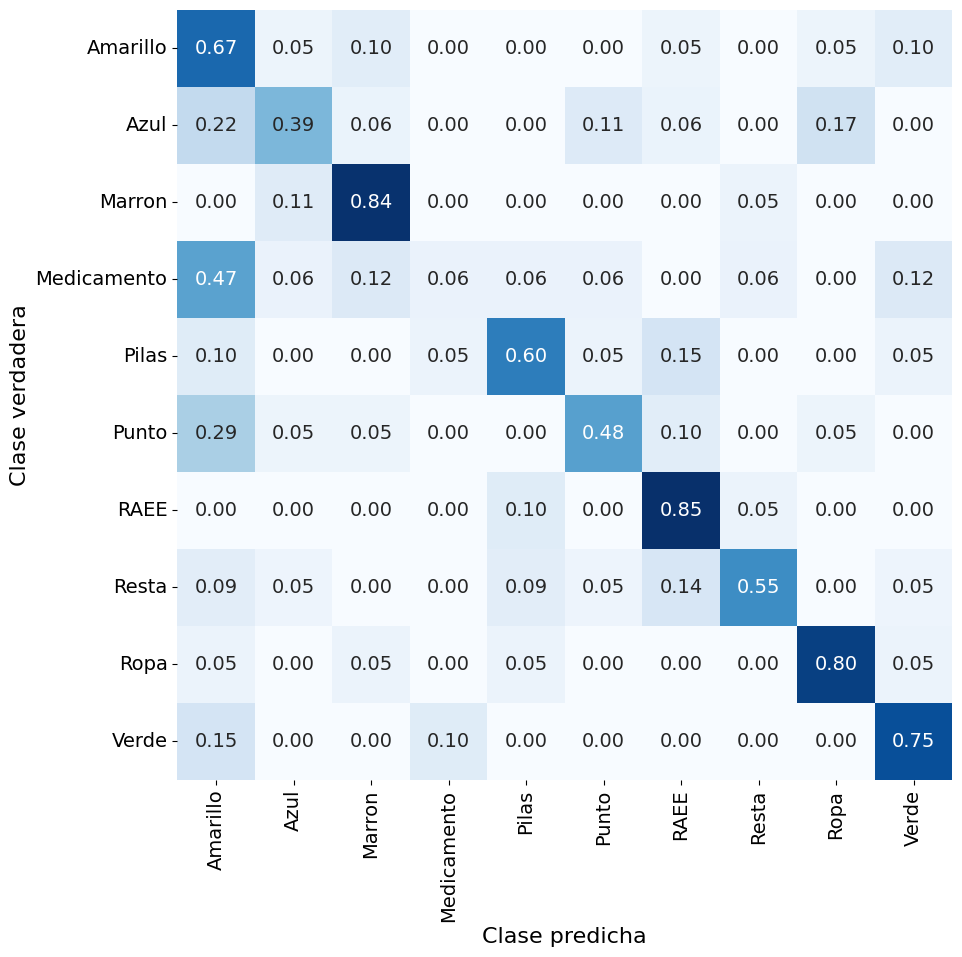

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels, fmt='.2f', annot_kws={'size': 14}, cbar=False)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.ylabel('Clase verdadera', fontsize=16)
plt.xlabel('Clase predicha', fontsize=16)
plt.show()

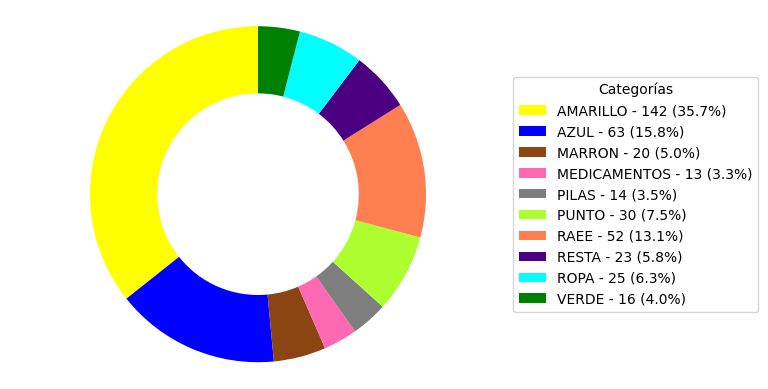

In [5]:
import matplotlib.pyplot as plt
import json

data_json = '''
{
  "AMARILLO": 142,
  "AZUL": 63,
  "MARRON": 20,
  "MEDICAMENTOS": 13,
  "PILAS": 14,
  "PUNTO": 30,
  "RAEE": 52,
  "RESTA": 23,
  "ROPA": 25,
  "VERDE": 16
}
'''

data = json.loads(data_json)

labels = list(data.keys())
sizes = list(data.values())
colors = ['#ffff00', '#0000ff', '#8b4513', '#ff69b4', '#7e7e7e', '#adff2f', '#ff7f50', '#4b0082', '#00ffff', '#008000']

fig, ax = plt.subplots()
wedges, texts = ax.pie(sizes, colors=colors, startangle=90, wedgeprops=dict(width=0.4))

# Estilos para textos y autotextos
ax.axis('equal')

# Función para calcular el porcentaje
def percentage(value, total):
    return f'{value} ({(value / total) * 100:.1f}%)'

total = sum(sizes)
legend_labels = [f'{label} - {percentage(value, total)}' for label, value in zip(labels, sizes)]

# Crear leyenda
ax.legend(wedges, legend_labels,
          title="Categorías",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()
